# CASA0007: Written Investigation

## Do economy, innovation and amenity influence the geographical distribution of R&D talents in China? -- evidence from 2015-2019 panel data

### Student ID: 20095783

#### Note: Data in this analysis can be found on: https://github.com/ucfnyua/CASA0007-Written_Investigation

### 1) Read in data

In [ ]:
# should install this library first and restart kernel to successfully run panel OLS regression
pip install linearmodels

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["axes.unicode_minus"]=False

# Read in data
RD = pd.read_csv('https://github.com/ucfnyua/CASA0007-Written_Investigation/blob/main/RD_panel.csv?raw=true')
RD = RD.set_index(["region","year"])
RD.head()

,,RD,GRP,Wage,Unemp,ExpSci,HEdu,Stu,Bed,SO2,Green,Lib
region,year,,,,,,,,,,,
Beijing,2016,111272,106009.16630,111390,1.4,5.015947,91,232.922156,5.14,7.12,16.00,24
Tianjin,2016,10336,106904.91270,80090,3.5,3.737838,55,215.970265,4.12,18.59,10.13,31
Hebei,2016,9400,40142.90909,50921,3.6,0.807856,118,91.927542,4.61,110.84,14.18,172
Shanxi,2016,5536,34843.04039,51803,3.5,1.094663,79,123.349345,5.00,112.06,11.61,126
Inner Mongolia,2016,3513,71013.58025,57135,3.7,0.839886,53,95.318200,5.33,123.09,19.28,117


In [2]:
# Check null
print(RD.isnull().sum())

RD        0
GRP       0
Wage      0
Unemp     0
ExpSci    0
HEdu      0
Stu       0
Bed       0
SO2       0
Green     0
Lib       0
dtype: int64


In [3]:
RD.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 155 entries, ('Beijing', 2016) to ('Xinjiang', 2020)
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RD      155 non-null    int64  
 1   GRP     155 non-null    float64
 2   Wage    155 non-null    int64  
 3   Unemp   155 non-null    float64
 4   ExpSci  155 non-null    float64
 5   HEdu    155 non-null    int64  
 6   Stu     155 non-null    float64
 7   Bed     155 non-null    float64
 8   SO2     155 non-null    float64
 9   Green   155 non-null    float64
 10  Lib     155 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 15.2+ KB


In [4]:
RD.describe()

,RD,GRP,Wage,Unemp,ExpSci,HEdu,Stu,Bed,SO2,Green,Lib
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,14825.980645,60865.254845,74132.941935,3.151613,2.111367,84.761290,123.981500,5.683613,34.626516,13.423032,102.096774
std,21278.033051,28078.630864,20940.095974,0.631567,1.518913,41.107885,39.905772,0.845779,27.659184,2.839872,46.716439
min,511.000000,26116.615380,45403.000000,1.300000,0.302901,6.000000,60.265306,4.020000,0.350000,5.850000,21.000000
25%,5224.000000,42214.758385,60496.500000,2.700000,1.035434,56.500000,99.749754,5.070000,16.610000,11.635000,66.000000
50%,8618.000000,50815.212430,68717.000000,3.200000,1.455514,82.000000,112.195693,5.660000,27.940000,12.980000,110.000000
75%,15055.000000,70793.547825,79362.000000,3.600000,2.855512,119.000000,146.180204,6.310000,48.040000,14.835000,129.500000
max,125390.000000,164212.071000,166803.000000,4.500000,6.756851,167.000000,244.854689,7.540000,152.570000,21.050000,206.000000


### 2) Check normal distribution

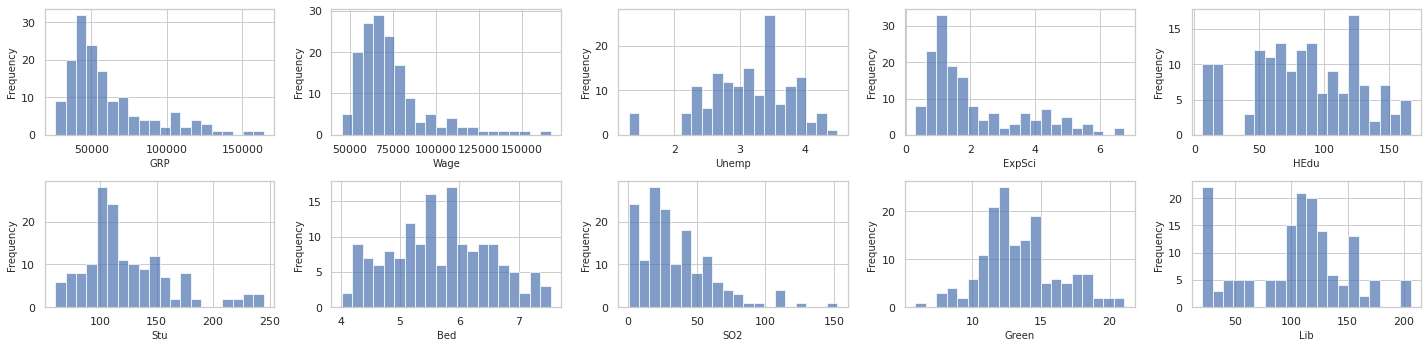

In [5]:
# set the columns of independent variables
columns = ["GRP","Wage","Unemp","ExpSci","HEdu","Stu","Bed","SO2","Green","Lib"]

# create a base axis for the plots
fig, ax = plt.subplots(2,5, figsize = (20,5))
# flatten the axis to make it easy to iterate over
axis = ax.flatten()

# iterate over each columns
for i, col in enumerate(columns):
    
    # create the histogram using the columns
    RD[col].hist(bins = 20,ax = axis[i],alpha = 0.7)

    # add label information
    axis[i].set_ylabel("Frequency", fontsize =10)
    axis[i].set_xlabel(f"{columns[i]}", fontsize = 10)

# keep the layout tight
plt.tight_layout()

# save the plot
fig.savefig('Distribution of independent variables.png', dpi=150)

In [6]:
# Take natural logarithm for the data

# set the columns
columns2 = ["GRP","Wage","ExpSci"]

# iterate over the columns
for col in columns2:
    # create a new log column and convert the data
    RD[col + "_log"] = np.log10(RD[col] + 1)
    # some issues are encountered so convert these to 0 values 
    RD[col + "_log"] = RD[col + "_log"].replace([np.inf, -np.inf], 0)

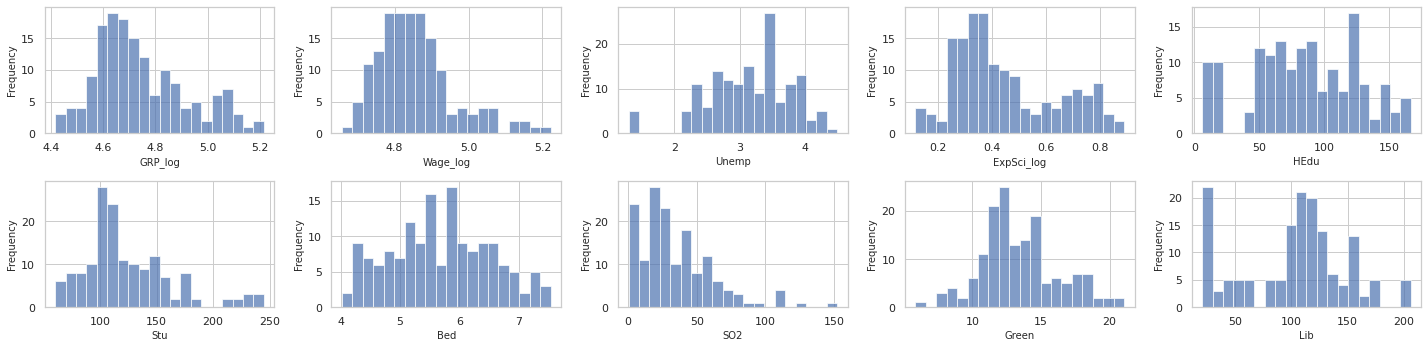

In [7]:
# Check the distribution of the data after taking natural logarithm

# set the columns of independent variables
columns = ["GRP_log","Wage_log","Unemp","ExpSci_log","HEdu","Stu","Bed","SO2","Green","Lib"]

# create a base axis for the plots
fig, ax = plt.subplots(2,5, figsize = (20,5))
# flatten the axis to make it easy to iterate over
axis = ax.flatten()

# iterate over each columns
for i, col in enumerate(columns):
    
    # create the histogram using the columns
    RD[col].hist(bins = 20,ax = axis[i],alpha = 0.7)

    # add label information
    axis[i].set_ylabel("Frequency", fontsize =10)
    axis[i].set_xlabel(f"{columns[i]}", fontsize = 10)

# keep the layout tight
plt.tight_layout()

# save the plot
fig.savefig('Distribution of independent variables (normalized).png', dpi=150)

In [8]:
RD = RD.drop(columns=["GRP","Wage","ExpSci"])
RD.head()

,,RD,Unemp,HEdu,Stu,Bed,SO2,Green,Lib,GRP_log,Wage_log,ExpSci_log
region,year,,,,,,,,,,,
Beijing,2016,111272,1.4,91,232.922156,5.14,7.12,16.00,24,5.025348,5.046850,0.779304
Tianjin,2016,10336,3.5,55,215.970265,4.12,18.59,10.13,31,5.029002,4.903584,0.675580
Hebei,2016,9400,3.6,118,91.927542,4.61,110.84,14.18,172,4.603620,4.706905,0.257164
Shanxi,2016,5536,3.5,79,123.349345,5.00,112.06,11.61,126,4.542129,4.714363,0.321114
Inner Mongolia,2016,3513,3.7,53,95.318200,5.33,123.09,19.28,117,4.851348,4.756910,0.264791


### 3) Panel OLS regression

In [9]:
pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [10]:
RD.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 155 entries, ('Beijing', 2016) to ('Xinjiang', 2020)
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RD          155 non-null    int64  
 1   Unemp       155 non-null    float64
 2   HEdu        155 non-null    int64  
 3   Stu         155 non-null    float64
 4   Bed         155 non-null    float64
 5   SO2         155 non-null    float64
 6   Green       155 non-null    float64
 7   Lib         155 non-null    int64  
 8   GRP_log     155 non-null    float64
 9   Wage_log    155 non-null    float64
 10  ExpSci_log  155 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 15.2+ KB


In [11]:
RD.describe()

,RD,Unemp,HEdu,Stu,Bed,SO2,Green,Lib,GRP_log,Wage_log,ExpSci_log
count,155.0000,155.0000,155.0000,155.0000,155.0000,155.0000,155.0000,155.0000,155.0000,155.0000,155.0000
mean,"14,825.9806",3.1516,84.7613,123.9815,5.6836,34.6265,13.4230,102.0968,4.7466,4.8559,0.4489
std,"21,278.0331",0.6316,41.1079,39.9058,0.8458,27.6592,2.8399,46.7164,0.1749,0.1064,0.1895
min,511.0000,1.3000,6.0000,60.2653,4.0200,0.3500,5.8500,21.0000,4.4169,4.6571,0.1149
25%,"5,224.0000",2.7000,56.5000,99.7498,5.0700,16.6100,11.6350,66.0000,4.6255,4.7817,0.3087
50%,"8,618.0000",3.2000,82.0000,112.1957,5.6600,27.9400,12.9800,110.0000,4.7060,4.8371,0.3901
75%,"15,055.0000",3.6000,119.0000,146.1802,6.3100,48.0400,14.8350,129.5000,4.8500,4.8996,0.5861
max,"125,390.0000",4.5000,167.0000,244.8547,7.5400,152.5700,21.0500,206.0000,5.2154,5.2222,0.8897


In [12]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [13]:
df_predictors_selected_VIF = drop_column_using_vif_(RD.drop(['RD'], axis=1))
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

Dropping: HEdu
The columns remaining after VIF selection are:
Index(['Unemp', 'Stu', 'Bed', 'SO2', 'Green', 'Lib', 'GRP_log', 'Wage_log',
       'ExpSci_log'],
      dtype='object')


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### 3.1 All sample

In [14]:
# Mixed model
from linearmodels.panel import PanelOLS
import statsmodels.api as sms
exog = sms.add_constant(df_predictors_selected_VIF)
model_RD = PanelOLS(RD['RD'], exog, entity_effects=False, time_effects=False)
model_RD = model_RD.fit()
print(model_RD)

                          PanelOLS Estimation Summary                           
Dep. Variable:                     RD   R-squared:                        0.6491
Estimator:                   PanelOLS   R-squared (Between):              0.7302
No. Observations:                 155   R-squared (Within):              -20.024
Date:                Sat, Jan 01 2022   R-squared (Overall):              0.6491
Time:                        20:37:12   Log-likelihood                   -1682.9
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      29.805
Entities:                          31   P-value                           0.0000
Avg Obs:                       5.0000   Distribution:                   F(9,145)
Min Obs:                       5.0000                                           
Max Obs:                       5.0000   F-statistic (robust):             29.805
                            

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
# Time fixed effects model
exog = sms.add_constant(df_predictors_selected_VIF)
model_RD2 = PanelOLS(RD['RD'], exog, entity_effects=False, time_effects=True)
model_RD2 = model_RD2.fit()
print(model_RD2)

                          PanelOLS Estimation Summary                           
Dep. Variable:                     RD   R-squared:                        0.8074
Estimator:                   PanelOLS   R-squared (Between):              0.8420
No. Observations:                 155   R-squared (Within):              -120.79
Date:                Sat, Jan 01 2022   R-squared (Overall):              0.3668
Time:                        20:37:30   Log-likelihood                   -1636.4
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      65.656
Entities:                          31   P-value                           0.0000
Avg Obs:                       5.0000   Distribution:                   F(9,141)
Min Obs:                       5.0000                                           
Max Obs:                       5.0000   F-statistic (robust):             65.656
                            

#### 3.2 Sample by region

##### 3.2.1 East

In [16]:
# Read in east region data
RD2 = pd.read_csv('https://github.com/ucfnyua/CASA0007-Written_Investigation/blob/main/RD_east.csv?raw=true')
RD2 = RD2.set_index(["region","year"])
RD2.head()

,,RD,GRP,Wage,Unemp,ExpSci,HEdu,Stu,Bed,SO2,Green,Lib
region,year,,,,,,,,,,,
Beijing,2016,111272,"106,009.1663",111390,1.4000,5.0159,91,232.9222,5.1400,7.1200,16.0000,24
Tianjin,2016,10336,"106,904.9127",80090,3.5000,3.7378,55,215.9703,4.1200,18.5900,10.1300,31
Hebei,2016,9400,"40,142.9091",50921,3.6000,0.8079,118,91.9275,4.6100,110.8400,14.1800,172
Liaoning,2016,14758,"65,424.5094",52332,3.4000,1.5378,116,162.2234,6.0900,96.8800,11.5200,129
Shanghai,2016,33943,"104,030.8489",109174,4.0000,4.3907,67,152.0634,5.0800,17.0800,7.6200,25


In [17]:
# Take natural logarithm for the data

# set the columns
columns2 = ["GRP","Wage","ExpSci"]

# iterate over the columns
for col in columns2:
    # create a new log column and convert the data
    RD2[col + "_log"] = np.log10(RD2[col] + 1)
    # some issues are encountered so convert these to 0 values 
    RD2[col + "_log"] = RD2[col + "_log"].replace([np.inf, -np.inf], 0)

In [18]:
RD2 = RD2.drop(columns=["GRP","Wage","ExpSci"])
RD2.head()

,,RD,Unemp,HEdu,Stu,Bed,SO2,Green,Lib,GRP_log,Wage_log,ExpSci_log
region,year,,,,,,,,,,,
Beijing,2016,111272,1.4000,91,232.9222,5.1400,7.1200,16.0000,24,5.0253,5.0469,0.7793
Tianjin,2016,10336,3.5000,55,215.9703,4.1200,18.5900,10.1300,31,5.0290,4.9036,0.6756
Hebei,2016,9400,3.6000,118,91.9275,4.6100,110.8400,14.1800,172,4.6036,4.7069,0.2572
Liaoning,2016,14758,3.4000,116,162.2234,6.0900,96.8800,11.5200,129,4.8157,4.7188,0.4045
Shanghai,2016,33943,4.0000,67,152.0634,5.0800,17.0800,7.6200,25,5.0172,5.0381,0.7316


In [22]:
RD2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 55 entries, ('Beijing', 2016) to ('Hainan', 2020)
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RD          55 non-null     int64  
 1   Unemp       55 non-null     float64
 2   HEdu        55 non-null     int64  
 3   Stu         55 non-null     float64
 4   Bed         55 non-null     float64
 5   SO2         55 non-null     float64
 6   Green       55 non-null     float64
 7   Lib         55 non-null     int64  
 8   GRP_log     55 non-null     float64
 9   Wage_log    55 non-null     float64
 10  ExpSci_log  55 non-null     float64
dtypes: float64(8), int64(3)
memory usage: 5.5+ KB


In [19]:
df_predictors_selected_VIF2 = drop_column_using_vif_(RD2.drop(['RD'], axis=1))
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF2.columns)

Dropping: Lib
Dropping: ExpSci_log
Dropping: Wage_log
Dropping: HEdu
The columns remaining after VIF selection are:
Index(['Unemp', 'Stu', 'Bed', 'SO2', 'Green', 'GRP_log'], dtype='object')


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [20]:
# Time fixed effects model
exog = sms.add_constant(df_predictors_selected_VIF2)
model_RD3 = PanelOLS(RD2['RD'], exog, entity_effects=False, time_effects=True)
model_RD3 = model_RD3.fit()
print(model_RD3)

                          PanelOLS Estimation Summary                           
Dep. Variable:                     RD   R-squared:                        0.8214
Estimator:                   PanelOLS   R-squared (Between):              0.8389
No. Observations:                  55   R-squared (Within):              -15.069
Date:                Sat, Jan 01 2022   R-squared (Overall):              0.7729
Time:                        22:32:38   Log-likelihood                   -599.49
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      33.718
Entities:                          11   P-value                           0.0000
Avg Obs:                       5.0000   Distribution:                    F(6,44)
Min Obs:                       5.0000                                           
Max Obs:                       5.0000   F-statistic (robust):             33.718
                            

##### 3.2.2 Middle

In [23]:
# Read in middle region data
RD3 = pd.read_csv('https://github.com/ucfnyua/CASA0007-Written_Investigation/blob/main/RD_middle.csv?raw=true')
RD3 = RD3.set_index(["region","year"])
RD3.head()

,,RD,GRP,Wage,Unemp,ExpSci,HEdu,Stu,Bed,SO2,Green,Lib
region,year,,,,,,,,,,,
Shanxi,2016,5536,"34,843.0404",51803,3.5000,1.0947,79,123.3493,5.0000,112.0600,11.6100,126
Jilin,2016,9126,"51,082.9277",51558,3.5000,1.2866,58,171.2110,5.2500,36.2900,12.5100,66
Heilongjiang,2016,7766,"39,568.9140",48881,4.5000,1.0672,81,134.8284,5.5800,45.6300,11.9800,107
Anhui,2016,11463,"35,816.4551",55139,3.1000,2.8238,119,101.4888,4.3500,48.0100,13.3700,122
Jiangxi,2016,6040,"36,626.7630",50932,3.4000,1.6949,97,110.9853,4.3300,52.8100,13.9600,114


In [24]:
# Take natural logarithm for the data

# set the columns
columns2 = ["GRP","Wage","ExpSci"]

# iterate over the columns
for col in columns2:
    # create a new log column and convert the data
    RD3[col + "_log"] = np.log10(RD3[col] + 1)
    # some issues are encountered so convert these to 0 values 
    RD3[col + "_log"] = RD3[col + "_log"].replace([np.inf, -np.inf], 0)

In [25]:
RD3 = RD3.drop(columns=["GRP","Wage","ExpSci"])
RD3.head()

,,RD,Unemp,HEdu,Stu,Bed,SO2,Green,Lib,GRP_log,Wage_log,ExpSci_log
region,year,,,,,,,,,,,
Shanxi,2016,5536,3.5000,79,123.3493,5.0000,112.0600,11.6100,126,4.5421,4.7144,0.3211
Jilin,2016,9126,3.5000,58,171.2110,5.2500,36.2900,12.5100,66,4.7083,4.7123,0.3592
Heilongjiang,2016,7766,4.5000,81,134.8284,5.5800,45.6300,11.9800,107,4.5974,4.6891,0.3154
Anhui,2016,11463,3.1000,119,101.4888,4.3500,48.0100,13.3700,122,4.5541,4.7415,0.5825
Jiangxi,2016,6040,3.4000,97,110.9853,4.3300,52.8100,13.9600,114,4.5638,4.7070,0.4305


In [26]:
RD3.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 40 entries, ('Shanxi', 2016) to ('Hunan', 2020)
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RD          40 non-null     int64  
 1   Unemp       40 non-null     float64
 2   HEdu        40 non-null     int64  
 3   Stu         40 non-null     float64
 4   Bed         40 non-null     float64
 5   SO2         40 non-null     float64
 6   Green       40 non-null     float64
 7   Lib         40 non-null     int64  
 8   GRP_log     40 non-null     float64
 9   Wage_log    40 non-null     float64
 10  ExpSci_log  40 non-null     float64
dtypes: float64(8), int64(3)
memory usage: 4.2+ KB


In [27]:
df_predictors_selected_VIF3 = drop_column_using_vif_(RD3.drop(['RD'], axis=1))
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF3.columns)

Dropping: HEdu
Dropping: Stu
Dropping: Bed
The columns remaining after VIF selection are:
Index(['Unemp', 'SO2', 'Green', 'Lib', 'GRP_log', 'Wage_log', 'ExpSci_log'], dtype='object')


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [28]:
# Time fixed effects model
exog = sms.add_constant(df_predictors_selected_VIF3)
model_RD4 = PanelOLS(RD3['RD'], exog, entity_effects=False, time_effects=True)
model_RD4 = model_RD4.fit()
print(model_RD4)

                          PanelOLS Estimation Summary                           
Dep. Variable:                     RD   R-squared:                        0.7987
Estimator:                   PanelOLS   R-squared (Between):              0.9062
No. Observations:                  40   R-squared (Within):              -66.728
Date:                Sun, Jan 02 2022   R-squared (Overall):             -0.0319
Time:                        10:34:35   Log-likelihood                   -351.56
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      15.875
Entities:                           8   P-value                           0.0000
Avg Obs:                       5.0000   Distribution:                    F(7,28)
Min Obs:                       5.0000                                           
Max Obs:                       5.0000   F-statistic (robust):             15.875
                            

##### 3.2.3 West

In [29]:
# Read in west region data
RD4 = pd.read_csv('https://github.com/ucfnyua/CASA0007-Written_Investigation/blob/main/RD_west.csv?raw=true')
RD4 = RD4.set_index(["region","year"])
RD4.head()

,,RD,GRP,Wage,Unemp,ExpSci,HEdu,Stu,Bed,SO2,Green,Lib
region,year,,,,,,,,,,,
Inner Mongolia,2016,3513,"71,013.5802",57135,3.7000,0.8399,53,95.3182,5.3300,123.0900,19.2800,117
Guangxi,2016,5250,"35,035.6964",52982,2.9000,1.2208,71,80.8159,4.4700,42.1200,11.6000,112
Chongqing,2016,4933,"52,095.6911",60543,3.6000,1.2044,64,146.9678,5.8500,49.5800,16.9900,43
Sichuan,2016,37334,"36,632.2526",58915,4.1000,1.2896,109,95.5191,5.9600,71.7600,11.9600,203
Guizhou,2016,3451,"29,752.2946",59701,3.3000,1.4895,59,79.8017,5.5700,85.3000,12.9400,96


In [30]:
# Take natural logarithm for the data

# set the columns
columns2 = ["GRP","Wage","ExpSci"]

# iterate over the columns
for col in columns2:
    # create a new log column and convert the data
    RD4[col + "_log"] = np.log10(RD4[col] + 1)
    # some issues are encountered so convert these to 0 values 
    RD4[col + "_log"] = RD4[col + "_log"].replace([np.inf, -np.inf], 0)

In [31]:
RD4 = RD4.drop(columns=["GRP","Wage","ExpSci"])
RD4.head()

,,RD,Unemp,HEdu,Stu,Bed,SO2,Green,Lib,GRP_log,Wage_log,ExpSci_log
region,year,,,,,,,,,,,
Inner Mongolia,2016,3513,3.7000,53,95.3182,5.3300,123.0900,19.2800,117,4.8513,4.7569,0.2648
Guangxi,2016,5250,2.9000,71,80.8159,4.4700,42.1200,11.6000,112,4.5445,4.7241,0.3465
Chongqing,2016,4933,3.6000,64,146.9678,5.8500,49.5800,16.9900,43,4.7168,4.7821,0.3433
Sichuan,2016,37334,4.1000,109,95.5191,5.9600,71.7600,11.9600,203,4.5639,4.7702,0.3598
Guizhou,2016,3451,3.3000,59,79.8017,5.5700,85.3000,12.9400,96,4.4735,4.7760,0.3961


In [32]:
RD4.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 60 entries, ('Inner Mongolia', 2016) to ('Xinjiang', 2020)
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RD          60 non-null     int64  
 1   Unemp       60 non-null     float64
 2   HEdu        60 non-null     int64  
 3   Stu         60 non-null     float64
 4   Bed         60 non-null     float64
 5   SO2         60 non-null     float64
 6   Green       60 non-null     float64
 7   Lib         60 non-null     int64  
 8   GRP_log     60 non-null     float64
 9   Wage_log    60 non-null     float64
 10  ExpSci_log  60 non-null     float64
dtypes: float64(8), int64(3)
memory usage: 6.0+ KB


In [33]:
df_predictors_selected_VIF4 = drop_column_using_vif_(RD4.drop(['RD'], axis=1))
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF4.columns)

Dropping: HEdu
The columns remaining after VIF selection are:
Index(['Unemp', 'Stu', 'Bed', 'SO2', 'Green', 'Lib', 'GRP_log', 'Wage_log',
       'ExpSci_log'],
      dtype='object')


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [34]:
# Time fixed effects model
exog = sms.add_constant(df_predictors_selected_VIF4)
model_RD5 = PanelOLS(RD4['RD'], exog, entity_effects=False, time_effects=True)
model_RD5 = model_RD5.fit()
print(model_RD5)

                          PanelOLS Estimation Summary                           
Dep. Variable:                     RD   R-squared:                        0.9248
Estimator:                   PanelOLS   R-squared (Between):              0.9477
No. Observations:                  60   R-squared (Within):              -40.700
Date:                Sun, Jan 02 2022   R-squared (Overall):              0.7273
Time:                        12:59:29   Log-likelihood                   -571.12
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      62.863
Entities:                          12   P-value                           0.0000
Avg Obs:                       5.0000   Distribution:                    F(9,46)
Min Obs:                       5.0000                                           
Max Obs:                       5.0000   F-statistic (robust):             62.863
                            